<a href="https://colab.research.google.com/github/Chantrey1972/Proyecto-del-M-dulo-3-Modelado-supervisado-en-Machine-Learning/blob/main/ENTREGABLE_PROYECTO_M3_CHANTREY_BRUZZO_de_UDD_ProyectoM3_Modelado_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootcamp Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 3: Modelado supervisado en Machine Learning



¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 3! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Esta actividad constará de dos partes. Revisa con cuidado cada una de las instrucciones y procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
* Diseñarás y aplicarás un modelo de regresión lineal y un modelo de regresión logística en el que:
  - harás _dummies_ a valores categóricos,
  - «splitear» _dataframe_,
  - estandarizarás conjuntos,  
  - entrenarás con conjunto de entrenamiento,
  - predecirás con conjunto de pruebas.
  -aplicar modelo,
  - predecir con conjunto de pruebas.
* Aplicarás cuadros de confusión y medirás la precisión.
* Graficarás mapas de calor a partir del cuadro de confusión.
* Utilizarás métricas MSE, RMSE y R2.

# Primera parte

Descarga el archivo de la siguiente liga: https://drive.google.com/file/d/1mwbTl_m-r6oyKVl_ZHPOE4Io5tMohkr1/view?usp=sharing

Un equipo de Recursos Humanos te acaba de proporcionar el archivo que has descargado. En este se indican algunas características que ellos creen que influyen en el salario que buscan algunas personas que se postulan en empresas de tecnología.

Este equipo pide de tu apoyo para diseñar un modelo que pueda predecir cuánto pedirá cada postulante con base en las siguientes características:

- Experiencia: Años de experiencia en el área.

- Posición: Posición que busca; existen tres opciones:

 - Analista
 - Coordinador
 - Gerente

- Hijos: Número de hijos que tiene.

- Casado: ¿El postulante está casado?

  - 0: No
  - 1: Sí

- Educación: ¿Cuál es el grado máximo de estudios concluido? Existen tres opciones:

  - Bachillerato
  - Licenciatura
  - Posgrado

- Salario: Cantidad en pesos mexicanos que pide. Esta variable es la que se pretende predecir en este ejercicio.

# Criterios de evaluación:
- Modelar regresión lineal correctamente (2 puntos):

  - hacer dummies a valores categóricos,
  - generar train_test_split,
  - estandarizar/reescalar conjuntos (solo si es necesario),
  - entrenar con conjunto de entrenamiento,
  - aplicar modelo,
  - predecir con conjunto de pruebas.

**Nota:** Si alguno de los 3 últimos puntos anteriores (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) no es realizado se descontará un punto.

- Aplicar por lo menos una métricas (2 puntos):

   - MSE,

   - RMSE
   
   - R2.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rrhh.csv")


In [ ]:
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario
0,0.5,Analista,4,1,Bachillerato,13540
1,5.6,Analista,2,0,Licenciatura,31240
2,11.7,Analista,1,0,Licenciatura,63880
3,5.2,Analista,2,1,Licenciatura,29960
4,7.2,Coordinador,2,1,Licenciatura,34710


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Experiencia  1000 non-null   float64
 1   Posicion     1000 non-null   object 
 2   Hijos        1000 non-null   int64  
 3   Casado       1000 non-null   int64  
 4   Educacion    1000 non-null   object 
 5   Salario      1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [ ]:
df.columns

Index(['Experiencia', 'Posicion', 'Hijos', 'Casado', 'Educacion', 'Salario'], dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Posicion', 'Educacion', 'Casado'], drop_first=True)

In [ ]:
df.head(3)

,Experiencia,Hijos,Salario,Posicion_Coordinador,Posicion_Gerente,Educacion_Licenciatura,Educacion_Posgrado,Casado_1
0,0.5,4,13540,False,False,False,False,True
1,5.6,2,31240,False,False,True,False,False
2,11.7,1,63880,False,False,True,False,False


In [ ]:
print(df.columns)

Index(['Experiencia', 'Hijos', 'Salario', 'Posicion_Coordinador',
       'Posicion_Gerente', 'Educacion_Licenciatura', 'Educacion_Posgrado',
       'Casado_1'],
      dtype='object')


In [ ]:
print(df)

     Experiencia  Hijos  Salario  Posicion_Coordinador  Posicion_Gerente  \
0            0.5      4    13540                 False             False   
1            5.6      2    31240                 False             False   
2           11.7      1    63880                 False             False   
3            5.2      2    29960                 False             False   
4            7.2      2    34710                  True             False   
..           ...    ...      ...                   ...               ...   
995          6.0      2    21820                 False             False   
996          6.9      1    34010                 False             False   
997         11.4      0    38840                 False             False   
998          9.9      2    45660                 False             False   
999         10.2      3    55210                 False             False   

     Educacion_Licenciatura  Educacion_Posgrado  Casado_1  
0                     False

In [ ]:
df.dtypes

,0
Experiencia,float64
Hijos,int64
Salario,int64
Posicion_Coordinador,bool
Posicion_Gerente,bool
Educacion_Licenciatura,bool
Educacion_Posgrado,bool
Casado_1,bool


In [ ]:
X = df.drop(columns=['Salario'])
y = df['Salario']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir las primeras predicciones
print("Predicciones con el conjunto de pruebas:")
print(y_pred[:10])

# Comparar las predicciones con los valores reales
print("Valores reales:")
print(y_test[:10].values)


Predicciones con el conjunto de pruebas:
[31439.42632652 49808.22324639 26084.67749541 21919.4046551
 28756.78472968 33830.41780883 17179.86081016 29272.95042607
 26382.04649311 44902.4716312 ]
Valores reales:
[32680 46650 30810 27780 33950 31680 16050 27100 21060 45300]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 35606817.91410992
RMSE: 5967.144871218557
R²: 0.6509821573169723


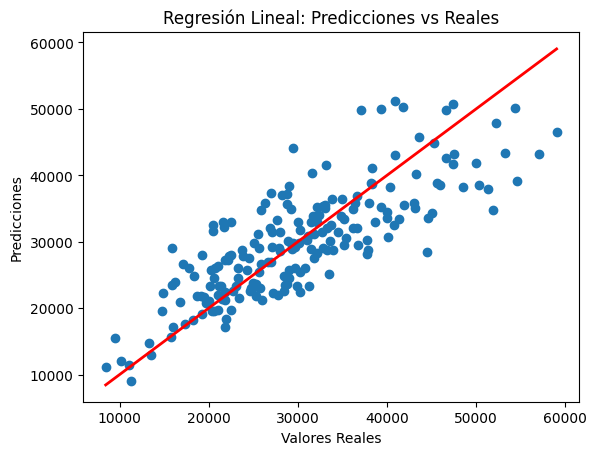

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.show()

-**Explicación del código:**

-**Variables dummy:** Las columnas categóricas se convierten en
variables dummy para que puedan ser utilizadas en el modelo.

-**División de datos:** Uso train_test_split para dividir los datos en un 80% de entrenamiento y 20% de prueba.

-**Estandarización:** Aplico StandardScaler para estandarizar los datos, lo que es útil cuando los rangos de las variables son muy diferentes.

-**Entrenamiento del modelo:** Uso la clase LinearRegression de sklearn para entrenar el modelo con el conjunto de entrenamiento.

-**Predicciones:** Se hacen predicciones en el conjunto de prueba.

-**Métricas:** Se calculan las métricas MSE, RMSE, y R² para evaluar el rendimiento del modelo.

-**Gráfica:** Se grafica una comparación entre los valores reales y las predicciones.

# **Segunda parte**

El equipo que te ha compartido la información te ha proporcionado un nuevo archivo, el cual puedes descargar de este link: https://drive.google.com/file/d/1qZsrAcB-02Z-8RA6wHzG2ZpJvYOFrTwp/view?usp=sharing

Es exactamente el mismo archivo de la parte 1, aunque ahora incluye una nueva columna, llamada Contratado, la cual tiene un 1 si el postulante fue contratado y un 0 si no lo fue.

En esta parte deberás hacer un modelo de clasificación que pueda predecir si un postulante será contrato o no, de acuerdo con las variables que te han compartido.

**Criterios de evaluación:**

- Modelar la regresión logística correctamente (2 puntos):
 - hacer dummies a valores categóricos,
 - «splitear» dataframe,
 - estandarizar conjuntos,
 - aplicar modelo,
 - entrenar con conjunto de entrenamiento,
 - predecir con conjunto de pruebas.

**Nota:** Si falta alguno de los 3 puntos finales (aplicar modelo, entrenar con conjunto de entrenamiento y predecir con conjunto de pruebas) se descontará un punto.

 - Aplicar cuadro de confusión y medir la precisión (2 puntos).
 - Graficar un mapa de calor del cuadro de confusión (2 puntos).

**Nota:** Las gráficas generadas deberán tener título y rótulos en sus ejes, de lo contrario, se descontará un punto.

En el caso de las métricas, deberás indicar qué significan; puedes hacerlo a través de un comentario o imprimiéndolo directamente en pantalla.



In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATAFRAME/rrhh_2.csv")

In [ ]:
df.head()

,Experiencia,Posicion,Hijos,Casado,Educacion,Salario,Contratado
0,0.5,Analista,4,1,Bachillerato,13540,1
1,5.6,Analista,2,0,Licenciatura,31240,0
2,11.7,Analista,1,0,Licenciatura,63880,0
3,5.2,Analista,2,1,Licenciatura,29960,1
4,7.2,Coordinador,2,1,Licenciatura,34710,1


In [ ]:
df.columns

Index(['Experiencia', 'Posicion', 'Hijos', 'Casado', 'Educacion', 'Salario',
       'Contratado'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Posicion', 'Educacion', 'Casado'], drop_first=True)

In [ ]:
print(df.columns)

Index(['Experiencia', 'Hijos', 'Salario', 'Contratado', 'Posicion_Coordinador',
       'Posicion_Gerente', 'Educacion_Licenciatura', 'Educacion_Posgrado',
       'Casado_1'],
      dtype='object')


In [ ]:
 print(df.describe())

       Experiencia        Hijos       Salario   Contratado
count  1000.000000  1000.000000   1000.000000  1000.000000
mean      6.416200     1.453000  30787.060000     0.518000
std       2.577612     1.208823  11520.200049     0.499926
min       0.100000     0.000000   5630.000000     0.000000
25%       4.600000     0.000000  22557.500000     0.000000
50%       6.400000     1.000000  29470.000000     1.000000
75%       8.100000     2.000000  37922.500000     1.000000
max      15.200000     4.000000  83470.000000     1.000000


In [ ]:
X = df.drop(columns=['Contratado'])
y = df['Contratado']

In [ ]:
X = df.drop(columns=['Contratado'])
y = df['Contratado']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred = model.predict(X_test)

# Mostrar las primeras predicciones
print("Predicciones con el conjunto de pruebas:")
print(y_pred[:10])

# Mostrar los valores reales correspondientes
print("Valores reales:")
print(y_test[:10].values)


Predicciones con el conjunto de pruebas:
[0 0 0 0 0 0 0 0 0 0]
Valores reales:
[1 1 0 0 0 0 1 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 49.00%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Cuadro de confusión:\n{conf_matrix}')

Cuadro de confusión:
[[ 98   0]
 [102   0]]


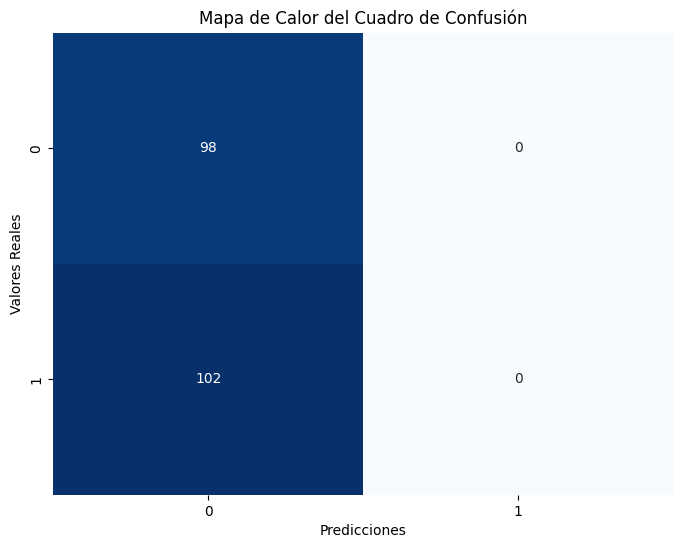

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Mapa de Calor del Cuadro de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

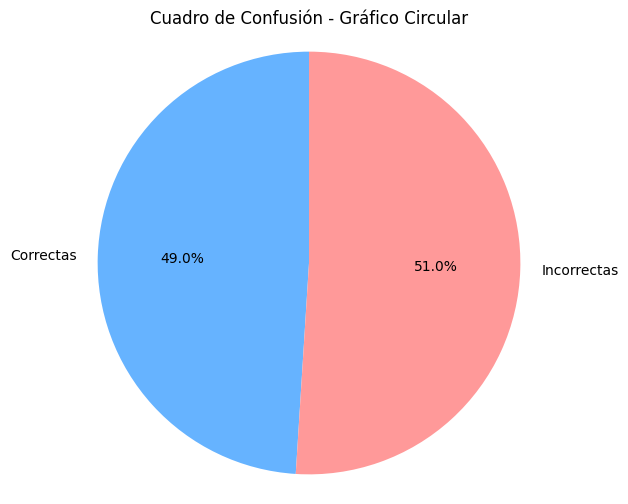

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Suma los valores de las predicciones correctas e incorrectas
correct_predictions = np.diag(conf_matrix).sum()
incorrect_predictions = conf_matrix.sum() - correct_predictions

# Crea un gráfico circular
labels = ['Correctas', 'Incorrectas']
sizes = [correct_predictions, incorrect_predictions]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Cuadro de Confusión - Gráfico Circular')
plt.show()

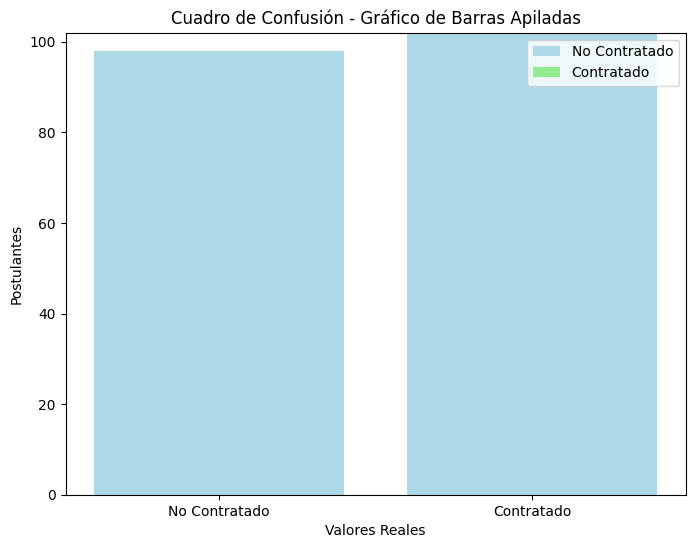

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Generar el cuadro de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Definir las etiquetas de las clases
labels = ['No Contratado', 'Contratado']

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 6))

# Barras para cada clase
plt.bar(labels, conf_matrix[:, 0], label='No Contratado', color='lightblue')
plt.bar(labels, conf_matrix[:, 1], bottom=conf_matrix[:, 0], label='Contratado', color='lightgreen')

plt.xlabel('Valores Reales')
plt.ylabel('Postulantes')
plt.title('Cuadro de Confusión - Gráfico de Barras Apiladas')
plt.legend()

plt.show()


**Explicación de las métricas**

**Matriz de Confusión:** Muestra los aciertos y errores del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


**Precisión (Accuracy):** Mide el porcentaje de predicciones correctas entre todas las instancias. Se calcula como (TP + TN) / (TP + TN + FP + FN).

**Reporte de Clasificación:**

- **Precisión (Precision):** Indica cuántas de las instancias predichas como positivas (Contratado) fueron realmente correctas. Se calcula como TP / (TP + FP).

- **Exhaustividad (Recall):** Mide cuántas de las instancias positivas reales fueron identificadas correctamente. Se calcula como TP / (TP + FN).

- **F1-Score:**Es una combinación de precisión y recall, útil cuando hay clases desbalanceadas. Se calcula como 2 * (Precision * Recall) / (Precision + Recall).











